In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle as pickle
from collections import Counter

## Change file path to emails.pickle file to match your own locally:

In [2]:
# ADD YOUR OWN FILE PATH LEADING TO emails.pickle FILE
with open("/Users/allison.lu/Downloads/emails.pickle",'rb') as f:
    email = pickle.load(f)

In [3]:
match = []
pdf_names = []
for i, j in email.items():
    count = Counter(j)
    j = count.most_common(1)
    i = i.rsplit("/", 1)[-1]
    i = i.replace(".txt", "")
    i = i.lower()
    match += [[i, j]]
    pdf_names += [i]
#     print(i)

pdf_names

['rui_han_2014',
 'cao_yinzhi_2014',
 'pewny_jannik_2014',
 'balduzzi_marco_2014',
 'tang_yuzhe_2014',
 'soren_bleikertz_2014',
 'yuru_shao_2014',
 'mathy_vanhoef_2014',
 'drew_davidson_2014',
 'hadziosmanovic_dina_2014',
 'rafique_zubair_2014',
 'adam_aviv_2014',
 'barreto_carlos_2014',
 'zhang_tianwei_2014',
 'hongyu_gao_2014',
 'hyngsub_kim_2014',
 'feng_qian_2014',
 'ritzdorf_hubert_2014',
 'arthur_gervais_2014',
 'degroef_willem_2014',
 'herzberg_amir_02014',
 'duman_sevtap_2014',
 'gionta_jason_2014',
 'henbrick_meutzner_2014',
 'tan_samuel_2014',
 'gawlik_robert_2014',
 'daniela_oliveira_2014',
 'aviel_rubin_2014',
 'pomonis_marios_2014',
 'mao_weixuan_2014',
 'jing_zhao_2014',
 'adrain_dabrowski_2014',
 'henry_carter_2014',
 'krotofil_marina_2014',
 'alt_lance_2014',
 'nakibly_gabi_2014',
 'mingshen_sun_2014',
 'chao_yang_2014',
 'herzberg_amir_2014',
 'michael_backes_02014',
 'strackx_raoul_2014',
 'fabienne_eigner_2014',
 'michael_backes_2014',
 'xavier_carnavalet_2014',
 'se

In [4]:
uni_df = pd.DataFrame(match)
uni_df.columns = ['File name', 'Count']

uni_df['Count'] = uni_df['Count'].astype(str).replace({"\[":"", "\]":"", "\(":"", "\)":"", "\'":""}, regex=True)

uni_df['Uni'] = uni_df['Count'].str.split(',').str[0]
uni_df['Uni'] = uni_df['Uni'].replace(r'^\s*$', np.nan, regex=True)

uni_df['Count'] = uni_df['Count'].str.split(',').str[1]

uni_df

,File name,Count,Uni
0,rui_han_2014,NaN,NaN
1,cao_yinzhi_2014,NaN,NaN
2,pewny_jannik_2014,NaN,NaN
3,balduzzi_marco_2014,1,marinetraffic
4,tang_yuzhe_2014,3,us.ibm
...,...,...,...
2015,yihua_zhang_2013,1,nd
2016,ben_niu_2013,1,lehigh
2017,zhan_wang_2013,1,@lois.cnJiwuJing*\n
2018,abedelaziz_mohaisen_2013_2,NaN,NaN


## Change PATH to match your own local path to conf folder:

In [5]:
# change PATH variable to reproducibility/conf folder
PATH = "change-path-to/reproducibility/conf"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

all_csv_files = [e for e in all_csv_files]

# print(all_csv_files)

In [6]:
dfs = pd.DataFrame()
for f in all_csv_files:
    df = pd.read_csv(f, on_bad_lines='skip')
    display(df)
    dfs = dfs.append(df)

,Conference,Year,Title,Authors,PDF Link,Code,status_code,Data,File name,Comments,Assigned To
0,AsiaCCS,2013,AppInk: watermarking android apps for repackag...,Zhou Wu and Zhang Xinwen and Jiang Xuxian,AppInk: Watermarking Android Apps for Repackag...,NaN,NaN,NaN,Wu_Zhou_2013,NaN,NaN
1,AsiaCCS,2013,PSiOS: bring your own privacy and security to ...,Werthmann Tim and Hund Ralf and Davi Lucas and...,https://dl.acm.org/doi/pdf/10.1145/2484313.248...,NaN,NaN,NaN,Tim_Werthmann_2013.pdf,NaN,NaN
2,AsiaCCS,2013,On the effectiveness of API-level access contr...,Hao Hao and Singh Vicky and Du Wenliang,https://dl.acm.org/doi/pdf/10.1145/2484313.248...,NaN,NaN,NaN,Hao_Hao_2013.pdf,NaN,NaN
3,AsiaCCS,2013,Designing leakage-resilient password entry on ...,Yan Qiang and Han Jin and Li Yingjiu and Zhou ...,https://dl.acm.org/doi/pdf/10.1145/2484313.248...,NaN,NaN,NaN,Qiang_Yan_2013.pdf,NaN,NaN
4,AsiaCCS,2013,Your love is public now: questioning the use o...,Gupta Payas and Gottipati Swapna and Jiang Jin...,https://dl.acm.org/doi/pdf/10.1145/2484313.248...,NaN,NaN,NaN,Payas_Gupta_2013.pdf,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
784,AsiaCCS,2023,A Transformer-based Function Symbol Name Infer...,"Hyunjin Kim,Jinyeong Bak,Kyunghyun Cho,Hyungjo...",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/agwaBom/AsmDepictor,200.0,NaN,Hyunjin_Kim.pdf,NaN,NaN
785,AsiaCCS,2023,ThreadLock: Native Principal Isolation Through...,"William Blair,William Robertson,Manuel Egele",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/BUseclab/threadlock,404.0,NaN,William_Blair.pdf,NaN,NaN
786,AsiaCCS,2023,Secure Context Switching of Masked Software Im...,"Barbara Gigerl,Robert Primas,Stefan Mangard",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/barbara-gigerl/sw-masking-rtos,404.0,NaN,Barbara_Gigerl.pdf,NaN,NaN
787,AsiaCCS,2023,A Scalable Double Oracle Algorithm for Hardeni...,"Yumeng Zhang,Max Ward,Mingyu Guo,Hung Nguyen",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,NaN,NaN,NaN,Yumeng_Zhang.pdf,NaN,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/62722316.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append(df)


,Conference,Year,Title,Authors,PDF Link,File name,Code,Data,status_code,Comments,Assigned To
0,ACSAC,2013,Systems thinking for safety and security,"William Young, Nancy Leveson",https://dl.acm.org/doi/pdf/10.1145/2523649.253...,william_young_2013,NaN,NaN,NaN,NaN,NaN
1,ACSAC,2013,AFrame: isolating advertisements from mobile a...,"Xiao Zhang, Amit Ahlawat, Wenliang Du",https://dl.acm.org/doi/pdf/10.1145/2523649.252...,xiao_zhang_2013,https://github.com/zhxzhxustc/AFrame,NaN,200.0,Android SDK,NaN
2,ACSAC,2013,The man who was there: validating check-ins in...,"Iasonas Polakis,Stamatis Volanis,Elias Athanas...",https://dl.acm.org/doi/pdf/10.1145/2523649.252...,iasonas_polakis_2013,NaN,NaN,NaN,NaN,NaN
3,ACSAC,2013,Discovery of emergent malicious campaigns in c...,"Nathaniel Boggs,Wei Wang,Suhas Mathur,Baris Co...",https://dl.acm.org/doi/pdf/10.1145/2523649.252...,nathaniel_boggs_2013,NaN,NaN,NaN,NaN,NaN
4,ACSAC,2013,Message in a bottle: sailing past censorship,"Panagiotis Papadopoulos,Antonis Papadogiannaki...",https://dl.acm.org/doi/pdf/10.1145/2523649.252...,panagiotis_papadopoulos_2013,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
624,ACSAC,2023,No Forking Way: Detecting Cloning Attacks on I...,"Briongos, Samira and Karame, Ghassan and Sorie...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,samira_briongos_2023,NaN,NaN,NaN,NaN,NaN
625,ACSAC,2023,Detecting Weak Keys in Manufacturing Certifica...,"Chi, Andrew and Enright, Brandon and McGrew, D...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,andrew_chi_02023,https://github.com/andrewchi/mercury/blob/acsa...,NaN,NaN,NaN,NaN
626,ACSAC,2023,Differentially Private Resource Allocation,"Chen, Joann Qiongna and Wang, Tianhao and Zhan...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,joann_chen_2023,https://github.com/dpra-dp/dpra,NaN,200.0,NaN,NaN
627,ACSAC,2023,Mitigating Membership Inference Attacks via We...,"Tan, Mingtian and Xie, Xiaofei and Sun, Jun an...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,mingtian_tan_2023,https://github.com/BennyTMT/weighted-smoothing,NaN,200.0,NaN,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/62722316.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append(df)


,Conference,Year,Title,Authors,PDF Link,File name,Code,status_code,Data,Comments,Assigned To
0,EuroS&P,2015,Using Hardware Features for Increased Debuggin...,"Fengwei Zhang,Kevin Leach,Angelos Stavrou,Hain...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,Fengwei_Zhang_2015.pdf,NaN,NaN,NaN,NaN,NaN
1,EuroS&P,2015,SoK: Secure Messaging,"Nik Unger,Serge Dechand,Joseph Bonneau,Sascha ...",https://www.ieee-security.org/TC/SP2015/papers...,Nik_Unger_2015.pdf,NaN,NaN,NaN,NaN,NaN
2,EuroS&P,2015,Secure Track Verification,"Vincent Lenders,Matthias Schafer,Jens Schmitt",https://www.ieee-security.org/TC/SP2015/papers...,Vincent_Lenders_2015.pdf,NaN,NaN,NaN,NaN,NaN
3,EuroS&P,2015,Connection-Oriented DNS to Improve Privacy and...,"Liang Zhu,Zi Hu,John Heidemann,Duane Wessels,A...",https://www.ieee-security.org/TC/SP2015/papers...,Liang_Zhu_2015.pdf,NaN,NaN,NaN,NaN,NaN
4,EuroS&P,2015,Understanding and Monitoring Embedded Web Scripts,"Yuchen Zhou,David Evans",https://www.ieee-security.org/TC/SP2015/papers...,Yuchen_Zhou_2015.pdf,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
285,EuroS&P,2023,Conjunctive Searchable Symmetric Encryption fr...,"Debadrita Talapatra,Sikhar Patranabis,Debdeep ...",https://eprint.iacr.org/2023/872.pdf,Debadrita_Talapatra_2023.pdf,NaN,NaN,NaN,NaN,NaN
286,EuroS&P,2023,Recurring Contingent Service Payment,"Aydin Abadi,Steven J. Murdoch,Thomas Zacharias",https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Aydin_Abadi_2023.pdf,https://github.com/AydinAbadi/RC-S-P/tree/main,200.0,NaN,NaN,NaN
287,EuroS&P,2023,Revelio: A Network-Level Attack Against the Pr...,"Theo von Arx,Muoi Tran,Laurent Vanbever",https://muoitran.com/publications/revelio.pdf,Theo_Arx_2023.pdf,NaN,NaN,NaN,NaN,NaN
288,EuroS&P,2023,SMART Credentials in the Multi-queue of Slackn...,"Jack P. K. Ma,Sherman S. M. Chow",https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Jack_Ma_2023.pdf,NaN,NaN,NaN,NaN,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/62722316.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append(df)


,Conference,Year,Title,Authors,PDF Link,File name,Code,status_code,Data,Comments
0,WiSec,2013,Who do you sync you are? Smartphone Fingerprin...,"Tim Stöber, Mario Frank, Jens Schmitt, Ivan Ma...",https://dl.acm.org/doi/pdf/10.1145/2462096.246...,Tim_Stober_2013.pdf,NaN,NaN,NaN,NaN
1,WiSec,2013,SnapMe if You Can: Privacy Threats of Other Pe...,"Benjamin Henne, Christian Szongott, Matthew Smith",https://dl.acm.org/doi/pdf/10.1145/2462096.246...,Benjamin_Henne_2013.pdf,NaN,NaN,NaN,NaN
2,WiSec,2013,A Pilot Study on the Security of Pattern Scree...,"Panagiotis Andriotis, Theo Tryfonas, George Oi...",https://dl.acm.org/doi/pdf/10.1145/2462096.246...,Panagiotis_Andriotis_2013.pdf,NaN,NaN,NaN,NaN
3,WiSec,2013,Adversarial Testing of Wireless Routing Implem...,"Md. Endadul Hoque, Hyojeong Lee, Rahul Pothara...",https://dl.acm.org/doi/pdf/10.1145/2462096.246...,MdEndadul_Hoque_2013.pdf,NaN,NaN,NaN,NaN
4,WiSec,2013,Subtle Kinks in Distance-Bounding: An Analysis...,"Marc Fischlin, Cristina Onete",https://dl.acm.org/doi/pdf/10.1145/2462096.246...,Marc_Fischlin_2013.pdf,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
297,WiSec,2023,Short Paper: Circumventing the Defense against...,"Hanif Rahbari, Naureen Hoque",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,Hanif_Rahbari_2023.pdf,https://github.com/hoquenaureen/attack-mo,200.0,https://github.com/hoquenaureen/attack-mo/tree...,NaN
298,WiSec,2023,Short Paper: Testing and Improving the Correct...,"Mathy Vanhoef, Xianjun Jiao, Wei Liu, Ingrid M...",https://dl.acm.org/doi/pdf/10.1145/3558482.358...,Mathy_Vanhoef_2023.pdf,https://github.com/vanhoefm/wifi-injection,200.0,NaN,NaN
299,WiSec,2023,UE Security Reloaded: Developing a 5G Standalo...,"Evangelos Bitsikas, Syed Khandker, Ahmad Salou...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,Evangelos_Bitsikas_2023.pdf,https://github.com/vaggelis-sudo/5G-UE-Securit...,200.0,NaN,NaN
300,WiSec,2023,Malicious Relay Detection and Legitimate Chann...,"Xingya Zhao, Wei-Han Chen, Kannan Srinivasan",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,Xingya_Zhao_2023.pdf,NaN,NaN,NaN,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/62722316.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append(df)


In [7]:
dfs["File name"] = dfs["File name"].str.replace(".pdf", "")

/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2496138337.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs["File name"] = dfs["File name"].str.replace(".pdf", "")


In [8]:
dfs = dfs[['Conference', 'Year', 'Title', 'Authors', 'File name', 'Code']]
dfs = dfs.rename(columns={'Title': 'Paper Title'})
dfs['File name'] = dfs['File name'].str.lower()
uni_df['File name'] = uni_df['File name'].str.lower()

In [9]:
uni_df['File name'] = uni_df['File name'].astype(str)
dfs['File name'] = dfs['File name'].astype(str)
# match_df['File name'] = match_df['File name'].astype(str)

In [10]:
match_df = pd.merge(dfs, uni_df, on ='File name', how='left')
match_df

,Conference,Year,Paper Title,Authors,File name,Code,Count,Uni
0,AsiaCCS,2013,AppInk: watermarking android apps for repackag...,Zhou Wu and Zhang Xinwen and Jiang Xuxian,wu_zhou_2013,NaN,2,ncsu
1,AsiaCCS,2013,PSiOS: bring your own privacy and security to ...,Werthmann Tim and Hund Ralf and Davi Lucas and...,tim_werthmann_2013,NaN,NaN,NaN
2,AsiaCCS,2013,On the effectiveness of API-level access contr...,Hao Hao and Singh Vicky and Du Wenliang,hao_hao_2013,NaN,1,syr
3,AsiaCCS,2013,Designing leakage-resilient password entry on ...,Yan Qiang and Han Jin and Li Yingjiu and Zhou ...,qiang_yan_2013,NaN,NaN,NaN
4,AsiaCCS,2013,Your love is public now: questioning the use o...,Gupta Payas and Gottipati Swapna and Jiang Jin...,payas_gupta_2013,NaN,1,smu
...,...,...,...,...,...,...,...,...
2039,WiSec,2023,Short Paper: Circumventing the Defense against...,"Hanif Rahbari, Naureen Hoque",hanif_rahbari_2023,https://github.com/hoquenaureen/attack-mo,1,mail.rit
2040,WiSec,2023,Short Paper: Testing and Improving the Correct...,"Mathy Vanhoef, Xianjun Jiao, Wei Liu, Ingrid M...",mathy_vanhoef_2023,https://github.com/vanhoefm/wifi-injection,3,imec
2041,WiSec,2023,UE Security Reloaded: Developing a 5G Standalo...,"Evangelos Bitsikas, Syed Khandker, Ahmad Salou...",evangelos_bitsikas_2023,https://github.com/vaggelis-sudo/5G-UE-Securit...,3,nyu
2042,WiSec,2023,Malicious Relay Detection and Legitimate Chann...,"Xingya Zhao, Wei-Han Chen, Kannan Srinivasan",xingya_zhao_2023,NaN,2,osu


## Change PATH to your own local path to evaluation folder:

In [11]:
# change PATH to reproducibility/evaluation folder
PATH = "change-file-path-to/reproducibility/evaluation"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

all_csv_files = [e for e in all_csv_files]

# print(all_csv_files)

In [12]:
compiles_dfs = pd.DataFrame()
for f in all_csv_files:
    df = pd.read_csv(f, on_bad_lines='skip')
    display(df)
    compiles_dfs = compiles_dfs.append(df)

,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,A Comprehensive Formal Analysis of 5G Handover,"Aleksi Peltonen, Ralf Sasse, David Basin",https://dl.acm.org/doi/pdf/10.1145/3448300.346...,https://github.com/tamarin-prover/tamarin-prov...,WiSec,2021,0.0,1.0,1,2.0,08/09/2023,Tamarin,NaN,2.0,-1.0,NaN,1.0,Academy of Finland,-1,I ran into trouble trying to install Tamarin t...
1,LNGate: Powering IoT with Next Generation Ligh...,"Ahmet Kurt, Suat Mercan, Omer Shlomovits, Enes...",https://dl.acm.org/doi/pdf/10.1145/3448300.346...,https://github.com/ZenGo-X/lightning,WiSec,2021,1.0,2.0,1,2.0,03/26/2021,C,NaN,2.0,-1.0,NaN,0.0,Cisco Foundation,-1,Dependency package is not available (404)
2,A Hybrid Approach to Secure Function Evaluatio...,"Joseph I. Choi,Dave (Jing) Tian,Grant Hernande...",https://dl.acm.org/doi/pdf/10.1145/3321705.332...,https://github.com/FICS/smcsgx,AsiaCCS,2019,0.0,1.0,1,2.0,05/08/2019,C++,NaN,2.0,-1.0,NaN,1.0,National Science Foundation,-1,Cannot successfully run 'make'
3,Model Extraction Attacks on Graph Neural Netwo...,Wu Bang and Yang Xiangwen and Pan Shirui and Y...,dl.acm.org/doi/pdf/10.1145/3488932.3497753,https://github.com/TrustworthyGNN/MEA-GNN,AsiaCCS,2022,0.0,1.0,1,2.0,02/15/2022,Python,NaN,2.0,-1.0,NaN,1.0,Australian Research Council,-1,Dependency code will not install
4,Symbolic Synthesis of Indifferentiability Attacks,Rakotonirina Itsaka and Ambrona Miguel and Agu...,dl.acm.org/doi/pdf/10.1145/3488932.3497759,https://github.com/miguel-ambrona/autodiff,AsiaCCS,2022,1.0,1.0,1,2.0,11/04/2021,OCaml,NaN,2.0,-1.0,NaN,1.0,NaN,-1,Make file refuses to work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Soteria: Offline Software Protection within Lo...,"Götzfried, Johannes, Müller, Tilo, de Clercq, ...",https://dl.acm.org/doi/pdf/10.1145/2818000.285...,https://www.cs1.tf.fau.de/research/system-secu...,ACSAC,2015,0.0,2.0,1,0.0,NaN,C,Needs MSP430 Board,2.0,-1.0,MSP430 Board,0.0,German Research Foundation,-1,Requires MSP430 microcontroller
68,"Efficient, Scalable, and Resilient Vehicle-Cen...","Mohammad Khodaei, Panos Papadimitratos",https://dlnext.acm.org/doi/pdf/10.1145/3212480...,https://wisecdata.ccs.neu.edu/vms/2018/WiSec20...,WiSec,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
69,Binary Hash Tree based Certificate Access Mana...,"Virendra Kumar, Jonathan Petit, William Whyte",https://dl.acm.org/doi/pdf/10.1145/3098243.309...,https://wisecdata.ccs.neu.edu/vms/2017/1_kumar...,WiSec,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
70,An Autonomic and Permissionless Android Covert...,"Kenneth Block, Sashank Narain, Guevara Noubir",https://dl.acm.org/doi/pdf/10.1145/3098243.309...,https://wisecdata.ccs.neu.edu/vms/2017/5_block...,WiSec,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,Masked Language Model Based Textual Adversaria...,"Xiaomei Zhang,Zhaoxi Zhang,Qi Zhong,Xufei Zhen...",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/mlmddetection/MLMDdetection,AsiaCCS,2023,0.0,1.0,1,2.0,12/15/2022,Python,NaN,2.0,-1.0,NaN,0.0,Technology Innovation and Application Developm...,-1,incompatible package dependencies from require...
1,Short Paper: Device Re-identification in LoRaW...,"Samuel Pélissier, Mathieu Cunche, Vincent Roca...",https://dl.acm.org/doi/pdf/10.1145/3507657.352...,https://gitlab.inria.fr/spelissi/wisec-2022-re...,WiSec,2022,1.0,2.0,1,2.0,03/28/2022,Python,NaN,2.0,-1.0,GPU,0.0,"ANR-BMBF PIVOT project, H2020 SPARTA, INSA-Lyo...","0,1,2",dataset with 11 million messages needed still ...
2,DHBE: Data-free Holistic Backdoor Erasing in D...,"Zhicong Yan,Shenghong Li,Ruijie Zhao,Yuan Tian...",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/yanzhicong/DHBE,AsiaCCS,2023,0.0,1.0,1,2.0,11/27/2022,Python,NaN,2.0,-1.0,NaN,0.0,"National Nature Science Foundation of China, S...",-1,train/test datasets not provided
3,Julia: Fast and Secure Key Agreement for IoT D...,"Frans Lundberg, Juraj Feljan",https://dl.acm.org/doi/pdf/10.1145/3448300.346...,https://github.com/assaabloy-ppi/julia-in-sage...,WiSec,2021,3.0,2.0,0,2.0,5/26/2021,Jupyter Notebook,NaN,2.0,-1.0,NaN,0.0,ASSA ABLOY AB,-1,"doesn't have any imports, fails from the first..."
4,Jujutsu: A Two-stage Defense against Adversari...,"Zitao Chen,Pritam Dash,Karthik Pattabiraman",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/DependableSystemsLab/Jujutsu,AsiaCCS,2023,0.0,2.0,1,2.0,11/24/2022,Python,NaN,2.0,-1.0,NaN,0.0,Natural Sciences and Engineering Research Coun...,-1,"import error, complains about numpy but numpy ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,argXtract: Deriving IoT Security Configuration...,"Sivakumaran, Pallavi and Blasco, Jorge",https://dl.acm.org/doi/pdf/10.1145/3485832.348...,https://github.com/projectbtle/argXtract,ACSAC,2021,0.0,1.0,0,2.0,1/17/2022,Python,bluetooth,5.0,-1.0,bluetooth,1.0,Engineering and Physical Sciences Research Cou...,0,NaN
59,IntFlow: improving the accuracy of arithmetic ...,"Pomonis, Marios and Petsios, Theofilos and Jee...",https://dl.acm.org/doi/pdf/10.1145/2664243.266...,https://github.com/nettrino/IntFlow,ACSAC,2014,0.0,1.0,1,2.0,4/4/2015,C/C++,NaN,2.0,-1.0,NaN,1.0,"DARPA, US Air Force, Intel",-1,archived github/read-only
60,Cross-Site Framing Attacks,"Gelernter, Nethanel, Grinstein, Yoel, Herzberg...",https://dl.acm.org/doi/pdf/10.1145/2818000.281...,https://sites.google.com/site/framingattacks/,ACSAC,2015,0.0,-1.0,1,-1.0,NaN,NaN,NaN,-1.0,-1.0,NaN,1.0,"Ministry of Science and Technology-Israel, Isr...",-1,broken link
61,Morpheus: automatically generating heuristics ...,"Jing, Yiming; Zhao, Ziming; Ahn, Gail-Joon; Hu...",https://dl.acm.org/doi/pdf/10.1145/2664243.266...,http://goo.gl/FXspKw,ACSAC,2014,0.0,-1.0,1,0.0,NaN,NaN,NaN,-1.0,-1.0,NaN,1.0,"National Science Foundation, National Research...",-1,broken link


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,Differentially Private Resource Allocation,"Chen, Joann Qiongna and Wang, Tianhao and Zhan...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/dpra-dp/dpra,ACSAC,2023,0.0,2.0,1,2,10/2/23,Python,NaN,1.0,1.0,NaN,0.0,NSF,"1,2",The output of the jupyter notebooks in their r...
1,DarkDialogs: Automated detection of 10 dark pa...,"Daniel Kirkman,Kami Vaniea,Daniel W Woods",https://www.danielwoods.info/assets/pdf/KVW_Da...,https://github.com/DarkDialogs/OpenScience,EuroS&P,2023,0.0,1.0,1,"2, DataShare",2/17/24,Python,Need Google Chrome and Linux,NaN,NaN,NaN,1.0,Laboratory for Foundations of Computer Science...,-1,NaN
2,Investigating Graph Embedding Methods for Cros...,"Victor Cochard, Damian Pfammatter, Chi Thang D...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/GESS-code/GESS,EuroS&P,2022,4.0,1.0,1,"2, figshare",1/13/23,Python,NaN,2.0,-1.0,NaN,0.0,NaN,-1,Two authors from Cyber-Defence Campus armasuis...
3,Stairway To Rainbow,"Gildas Avoine,Xavier Carpent,Diane Leblanc-Alb...",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/DianeLeblancAlbarel/Stairwa...,AsiaCCS,2023,0.0,1.0,1,2,6/9/22,"C, Python",NaN,1.0,-1.0,NaN,0.0,"COSIC/KULeuven (Leuven, Belgium)",-1,Output just indicates how many attacks were su...
4,Invasion of location privacy using online map ...,"Hyunsoo Kim,Youngbae Jeon,Ji Won Yoon",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/aitch25/asiaccs23_location_...,AsiaCCS,2023,2.0,1.0,1,2,11/11/23,Python,NaN,1.0,-1.0,NaN,0.0,Institute of Information & Com- munications Te...,-1,NaN
5,PhishReplicant: A Language Model-based Approac...,"Koide, Takashi and Fukushi, Naoki and Nakano, ...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/tkoide398/PhishReplicant,ACSAC,2023,3.0,2.0,1,2,9/26/23,Python,NaN,0.0,1.0,NaN,0.0,NaN,0,They provide sample data for reproduciblity. A...
6,POPKORN: Popping Windows Kernel Drivers At Scale,"Rajat Gupta, Lukas Patrick Dresel, Noah Spahn,...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/ucsb-seclab/popkorn-artifact,ACSAC,2022,0.0,2.0,1,2,10/14/22,"Python, Docker file, Shell",NaN,0.0,-1.0,94GB RAM,0.0,"DARPA, NSF, ONR, Intel Corp",1,Was still running after 24 hours. I stopped it...
7,More is Better (Mostly): On the Backdoor Attac...,"Jing Xu, Rui Wang, Stefanos Koffas, Kaitai Lia...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/xujing1994/bkd_fedgnn,ACSAC,2022,0.0,1.0,1,2,5/3/23,Python,NaN,1.0,1.0,NaN,0.0,NaN,0,NaN
8,Better Together: Attaining the Triad of Byzant...,"Liyue Shen, Yanjun Zhang, Jingwei Wang, Guangd...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/UQ-Trust-Lab/AgrAmplifier,ACSAC,2022,0.0,2.0,1,2,10/16/22,Python,NaN,0.0,0.0,64GB RAM,0.0,NaN,0,Confusing instructions for how to check if oup...
9,SpacePhish: The Evasion-space of Adversarial A...,"Giovanni Apruzzese, Mauro Conti, Ying Yuan",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://spacephish.github.io,ACSAC,2022,0.0,2.0,"3,4","0,2",12/11/23,"HTML, Python",NaN,1.0,-1.0,NaN,1.0,Hilti corporation,1,One file didn't run because of missing data. A...


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,Practical Binary Code Similarity Detection wit...,"Sunwoo Ahn, Seonggwan Ahn, Hyungjoon Koo, Yunh...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/asw0316/binshot,ACSAC,2022,0,2.0,1.0,2.0,12/28/2022,Python,1.0,NaN,NaN,NaN,1.0,NRF,0.0,Requires IdaPro subscription
1,An Empirical Study of Prioritizing JavaScript ...,"Sunnyeo Park,Dohyeok Kim,Sooel Son",https://dl.acm.org/doi/pdf/10.1145/3321705.332...,https://github.com/WSP-LAB/CRScope,AsiaCCS,2019,0,1.0,1.0,2.0,08/28/2019,JavaScript,NaN,0.0,1.0,NaN,1.0,NRF,-1.0,THEY USE PYTHON 2!! They don't specify a versi...
2,ILLUMINATI: Towards Explaining Graph Neural Ne...,"Haoyu He, Yuede Ji, H. Howie Huang",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/iHeartGraph/Illuminati,EuroS&P,2022,0,1.0,1.0,2.0,06/30/2022,Python,NaN,2.0,0.0,NaN,1.0,NaN,-1.0,"They do not list dependecies, At least one of ..."
3,DY⋆: A Modular Symbolic Verification Framework...,"Karthikeyan Bhargavan,Abhishek Bichhawat,Quoc ...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/REPROSEC/dolev-yao-star,EuroS&P,2021,0,1.0,1.0,2.0,03/17/2023,OCaml,NaN,0.0,1.0,NaN,1.0,DFG,-1.0,NaN
4,PRADA: Protecting Against DNN Model Stealing A...,"Mika Juuti, Sebastian Szyller, Samuel Marchal,...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/SSGAalto/prada-protecting-a...,EuroS&P,2019,0,1.0,1.0,2.0,03/20/2019,Python,NaN,2.0,0.0,NaN,1.0,ICRI-CARS,-1.0,They do not provide examples or anything just ...
5,Towards Understanding Limitations of Pixel Dis...,"Jiefeng Chen, Xi Wu, Vaibhav Rastogi, Yingyu L...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/jfc43/pixel-discretization,EuroS&P,2019,1,2.0,1.0,2.0,02/16/2022,Python,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Matlab for python required, need matlab instal..."
6,DroidEvolver: Self-Evolving Android Malware De...,"Ke Xu, Yingjiu Li, Robert H. Deng, Kai Chen, J...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/DroidEvolver/DroidEvolver,EuroS&P,2019,0,1.0,1.0,2.0,04/17/2020,Python,NaN,2.0,0.0,NaN,1.0,AXA Research Fund,-1.0,Don't give a version for python! They use pyth...
7,PAVUDI: Patch-based Vulnerability Discovery us...,"Ganz, Tom and Imgrund, Erik and H\""{a",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/SAP-samples/security-resear...,ACSAC,2023,2,2.0,1.0,2.0,10/18/2023,C,NaN,0.0,0.0,NaN,1.0,"BMBF, Germany",1.0,Their output metrics do not match what metrics...
8,On the Detection of Image-Scaling Attacks in M...,"Quiring, Erwin and M\""{u",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/EQuiw/2023-detection-scalin...,ACSAC,2023,0,2.0,1.0,2.0,09/19/2023,Python,NaN,0.0,1.0,NaN,1.0,"DFG, German Research Foundation",0.0,NaN
9,RaceBench: A Triggerable and Observable Concur...,"Jiashuo Liang,Ming Yuan,Zhanzhao Ding,Siqi Ma,...",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/rb130/RaceBench\nhttps://gi...,AsiaCCS,2023,0,2.0,1.0,2.0,03/24/2023,Python,NaN,2.0,0.0,NaN,1.0,National Key Research and Devel- opment Progra...,-1.0,Despite not mentioning it in their readme they...


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,Automating the Quantitative Analysis of Reprod...,"Manuel Pöll, Michael Roland",https://dl.acm.org/doi/pdf/10.1145/3507657.352...,https://github.com/mobilesec/reproducible-buil...,WiSec,2022,0,2.0,1.0,2,"April 4th, 2022",Shell,NaN,NaN,NaN,NaN,0.0,Austrian Government,3,NaN
1,On the Security of Thread Networks: Experiment...,"Dimitrios-Georgios Akestoridis, Vyas Sekar, Pa...",https://dl.acm.org/doi/pdf/10.1145/3507657.352...,https://github.com/akestoridis/atusb-attacks,WiSec,2022,0,2.0,0.0,2,"May 19th, 2022",C,NaN,NaN,NaN,NaN,0.0,CMU,-1,NaN
2,Replay Attacks and Defenses Against Cross-shar...,"Alberto Sonnino, Shehar Bano, Mustafa Al-Bassa...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/sheharbano/byzcuit,EuroS&P,2020,0,1.0,1.0,2,"April 6th, 2020",Python,NaN,NaN,NaN,NaN,NaN,"EPSRC, EUH2020 DECODE",-1,NaN
3,FLAIR: Defense against Model Poisoning Attack ...,"Atul Sharma,Wei Chen,Joshua Zhao,Qiang Qiu,Sau...",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/icanforce/federated-learnin...,AsiaCCS,2023,0,2.0,1.0,2,"January 31st, 2023",Python,NaN,NaN,NaN,NaN,0.0,"NSF, ARL",-1,NaN
4,Remote Attestation with Constrained Disclosure,"Eckel, Michael and George, Dominik Roy and Gro...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/DominikRoy/RACD,ACSAC,2023,1,2.0,1.0,2,"September 30th, 2023",C,NaN,NaN,NaN,NaN,1.0,National Research Center for Applied Cybersecu...,2,NaN
5,DOPE: DOmain Protection Enforcement with PKS,"Maar, Lukas and Schwarzl, Martin and Rauscher,...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://extgit.iaik.tugraz.at/sesys/dope,ACSAC,2023,0,2.0,1.0,4,August 2023,Shell,NaN,NaN,NaN,NaN,0.0,FFG,1,NaN
6,FLEDGE: Ledger-based Federated Learning Resili...,"Castillo, Jorge and Rieger, Phillip and Fereid...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/jacastillo8/FLEDGE,ACSAC,2023,1,2.0,1.0,2,"December 2nd, 2023",JavaScript,NaN,NaN,NaN,NaN,0.0,DOE,1,NaN
7,Secure MLaaS with Temper: Trusted and Efficien...,"Li, Fabing and Li, Xiang and Gao, Mingyu",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/tsinghua-ideal/TEMPER-Secur...,ACSAC,2023,0,2.0,1.0,2,"September 27th, 2023",Rust,NaN,NaN,NaN,NaN,NaN,NNSF of China,2,NaN
8,MAVERICK: An App-independent and Platform-agno...,"M. Hammad Mazhar, Li Li, Endadul Hoque, and Om...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/hammadmazhar1/MAVERICK,WiSec,2023,0,2.0,1.0,2,"July 5th, 2023",C,NaN,NaN,NaN,NaN,NaN,NSF,-1,NaN
9,Assessing Model-free Anomaly Detection in Indu...,"Aless Erba, ro, Nils Ole Tippenhauer",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/scy-phy/ICS_Generic_Conceal...,ACSAC,2022,0,NaN,NaN,2,6/15/23,"Python, MATLAB",Needs Matlab GUI,NaN,NaN,NaN,1.0,Not specified,1,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,"4,6",ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,UE Security Reloaded: Developing a 5G Standalo...,"Evangelos Bitsikas, Syed Khandker, Ahmad Salou...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/vaggelis-sudo/5G-UE-Securit...,WiSec,2023,1,2.0,1,2,01/25/2024,Python,NaN,0.0,-1,None,1,Google 2022 Android Security and PrIvacy REsea...,-1.0,"Requires hardware (smartphone) to test, but no..."
1,EF/CF: High Performance Smart Contract Fuzzing...,"Michael Rodler,David Paaßen,Wenting Li,Lukas B...",https://arxiv.org/pdf/2304.06341.pdf,https://github.com/uni-due-syssec/efcf-framework/,EuroS&P,2023,2,2.0,"1,3",2,06/11/2023,Python,NaN,0.0,1,None,0,"Deutsche Forschungsgemeinschaft (DFG, German R...",-1.0,Provided extremely helpful docker container th...
2,Owfuzz: Discovering Wi-Fi Flaws in Modern Devi...,"Hongjian Cao, Lin Huang, Shuwei Hu, Shangcheng...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/Owfuzz/Owfuzz,WiSec,2023,3,2.0,1,2,02/15/2023,C,NaN,1.0,-1,OpenWiFi dev board,1,None,-1.0,NaN
3,Anomaly-based Filtering of Application-Layer D...,"Jonas Bushart,Christian Rossow",https://publications.cispa.saarland/3925/1/dns...,https://github.com/cispa/DNS-Applayer-DDoS-Pro...,EuroS&P,2023,4,1.0,1,2,04/18/2023,"Rust, Python",NaN,1.0,-2,None,0,None,-1.0,Had to sort out some compilation steps and dep...
4,RandCompile: Removing Forensic Gadgets from th...,"Franzen, Fabian and Wilhelmer, Andreas Chris a...",https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/tum-itsec/randcompile,ACSAC,2023,0,2.0,1,2,08/22/2023,C,NaN,0.0,1,None,0,None,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Short: Device-to-Identity Linking Attack Using...,"Mathieu Cunche, Jagdish Prasad Achara, Célesti...",https://dl.acm.org/doi/pdf/10.1145/2766498.276...,https://github.com/Perdu/geoloc_attack,WiSec,2015,1,2.0,1,2,02/03/2015,Perl,1.0,NaN,NaN,WiFi Card,1,None,-1.0,Required hardware not available on VM (Wi-Fi c...
89,Shatter: Using Threshold Cryptography to Prote...,"Erinn Atwater, Urs Hengartner",https://dl.acm.org/doi/pdf/10.1145/2939918.293...,https://crysp.uwaterloo.ca/software/shatter/,WiSec,2016,0,-1.0,-1,-1,None,None,NaN,-1.0,-1,None,1,supported by funding from the Natu-\nral Scien...,-1.0,Actual code 404'd--no way to retrieve libshatt...
90,SRide: A Privacy-Preserving Ridesharing System,"Ulrich Matchi Aïvodji, Kévin Huguenin, Marie-J...",https://dlnext.acm.org/doi/pdf/10.1145/3212480...,https://github.com/CryptoExperts/FV-NFLlib,WiSec,2018,"4,0",1.0,1,2,07/26/2016,C++,NaN,1.0,-1,None,1,None,-1.0,Had to pull and build a different library befo...
91,WADAC: Privacy-Preserving Anomaly Detection an...,"Ragav Sridharan, Rajib Ranjan Maiti, Nils Ole ...",https://dlnext.acm.org/doi/pdf/10.1145/3212480...,https://github.com/scy-phy/wadac,WiSec,2018,0,-1.0,1,2,01/17/2022,Python,NaN,2.0,-1,None,1,None,-1.0,Couldn't get data extracted--R files wouldn't ...


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Made Available,Type,...,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,PAcT: Detecting and Classifying Privacy Behavi...,"Vijayanta Jain, Sanonda Datta Gupta, Sepideh G...",https://dl.acm.org/doi/pdf/10.1145/3507657.352...,https://github.com/PERC-Lab/PAcT,WiSec,2022,1,2,2.0,1,...,"Aug 20, 2023",Python,NaN,2,-1,NaN,0,NaN,0,Some extra depenendencies not mentioned in the...
1,Short Paper: BP-MAC: Fast Authentication for S...,"Eric Wagner, Martin Serror, Klaus Wehrle, Mart...",https://dl.acm.org/doi/pdf/10.1145/3507657.352...,https://github.com/fkie-cad/bpmac,WiSec,2022,0,2,0.0,1,...,"Nov 22, 2022",c,NaN,2,-1,NaN,1,"Deutsche Forschungsgemeinschaft (DFG, German R...",4,NaN
2,Differentially Private Two-Party Set Operations,"Bailey Kacsmar, Basit Khurram, Nils Lukas, Ale...",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/cryspuwaterloo/DiPSI,EuroS&P,2020,0,1,0.0,1,...,"Mar 19, 2020",cpp,NaN,2,-1,NaN,0,"NSERC, Royal Bank of Canada, European Union’s ...",-1,Poor Instructions for setup. Issue with make f...
3,Signal Injection Attacks against CCD Image Sen...,Kohler Sebastian and Baker Richard and Martino...,dl.acm.org/doi/pdf/10.1145/3488932.3497771,https://github.com/ssloxford/ccd-signal-inject...,AsiaCCS,2022,0,1,0.0,1,...,"Aug 26, 2021",Python,SDR,0,-1,"SDR, Antenna",1,EPSRC and the Hans Böckler Foundation,-1,Made to reproduce attack and not results
4,HoneyGen: Generating Honeywords Using Represen...,Dionysiou Antreas and Vassiliades Vassilis and...,https://dl.acm.org/doi/pdf/10.1145/3433210.345...,https://bitbucket.org/srecgrp/honeygen-generat...,AsiaCCS,2021,1,1,2.0,1,...,"Dec 12, 2021",Python,NaN,0,1,NaN,0,"European Union’s Horizon, Government of the Re...",-1,Python script to generate results from each ta...
5,Conware: Automated Modeling of Hardware Periph...,Spensky Chad and Machiry Aravind and Redini Ni...,https://dl.acm.org/doi/pdf/10.1145/3433210.343...,https://github.com/ucsb-seclab/conware,AsiaCCS,2021,0,2,0.0,1,...,"Jul 19, 2020",c,More time,-1,-1,NaN,1,"Office of Naval Research, Department of Homela...",-1,Dependency installation takes a long time
6,The Taint Rabbit: Optimizing Generic Taint Ana...,John Galea and Daniel Kroening,https://dl.acm.org/doi/pdf/10.1145/3320269.338...,https://github.com/Dynamic-Rabbits/Dynamic-Rab...,AsiaCCS,2020,0,1,0.0,1,...,"Nov 10, 2021",c,NaN,2,-1,NaN,1,"EPSRC CDTin Cyber Security, VETSS and the Ende...",-1,Has dependency on DynamoRIO. Although the scri...
7,EGIS: Shileding Vulnerable Smart Contracts Aga...,Christof Ferreira Torres and Mathis Baden and...,https://dl.acm.org/doi/pdf/10.1145/3320269.338...,https://github.com/christoftorres/Aegis,AsiaCCS,2020,0,1,1.0,1,...,"Aug 13, 2020",Docker,NaN,2,-1,NaN,1,Luxembourg National Research Fund (,-1,No listening ports to HTTP-RCP server identifi...
8,Utilizing Public Blockchains for the Sybil-Res...,Roman Matzutt and Jan Pennekamp and Erik Buchh...,https://dl.acm.org/doi/pdf/10.1145/3320269.338...,https://github.com/COMSYS/anonboot,AsiaCCS,2020,0,2,0.0,1,...,"Mar 1, 2023",Python,More time,0,-1,NaN,1,German Federal Ministry of Education and Research,-1,Paper says worst case time for bootstrapping i...
9,"Skeptic: Automatic, Justified and Privacy-Pres...",Saul johnson and Joao Ferreira and Mendes Alex...,https://dl.acm.org/doi/pdf/10.1145/3320269.338...,https://github.com/sr-lab/skeptic-authority-te...,AsiaCCS,2020,0,2,0.0,1,...,"Dec 8, 2019","Coq, Python",NaN,2,-1,NaN,1,NaN,-1,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,Smart Contract-based Miner Registration and Bl...,"Shijie Zhang,Jong-Hyouk Lee",https://dl.acm.org/doi/pdf/10.1145/3321705.333...,https://github.com/zzyzydb/Miner-Registration,AsiaCCS,2019,0.0,1.0,1.0,2.0,04/06/2020,solidity,NaN,1.0,1.0,NaN,0.0,MSIT Korea,-1.0,Required installing additional packages and ch...
1,DynaGuard: Armoring Canary-based Protections a...,"Petsios, Theofilos, Kemerlis, Vasileios P., Po...",https://dl.acm.org/doi/pdf/10.1145/2818000.281...,https://github.com/nettrino/dynaguard\t,ACSAC,2015,0.0,2.0,1.0,2.0,04/24/2016,C/C++,NaN,2.0,-1.0,NaN,1.0,Office of Naval Research,-1.0,Both versions don't compile
2,Secure and Efficient Key Derivation in Portfol...,"Mayer, Peter, Volkamer, Melanie",https://dl.acm.org/doi/pdf/10.1145/2818000.281...,https://github.com/SecUSo/t-n-threshold-verifi...,ACSAC,2015,0.0,1.0,1.0,2.0,04/28/2015,Mathematica,NaN,4.0,-1.0,NaN,-1.0,German Federal Ministry for Economic Affairs a...,-1.0,Mathematica Requires a paid license to use
3,ShowTime: Amplifying Arbitrary CPU Timing Side...,"Antoon Purnal,Marton Bognar,Frank Piessens,Ing...",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/KULeuven-COSIC/ShowTime,AsiaCCS,2023,0.0,2.0,1.0,2.0,07/21/2023,C,Run with correct hardware,0.0,-1.0,Intel i7-7700k,0.0,"European Research Council, Flemish Gov",-1.0,"Designed for specific CPU, author notes that r..."
4,K2SN-MSS: An Efficient Post-Quantum Signature,"Sabyasachi Karati,Reihaneh Safavi-Naini",https://dl.acm.org/doi/pdf/10.1145/3321705.332...,https://github.com/skarati/K2SN-MSS,AsiaCCS,2019,0.0,-1.0,1.0,2.0,06/26/2019,C/C++,NaN,0.0,0.0,NaN,0.0,NaN,-1.0,"Program hangs/runs forever, no output generated"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,NeuGuard: Lightweight Neuron-Guided Defense ag...,"Nuo Xu, Binghui Wang, Ran Ran, Wujie Wen, Parv...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/nux219/NeuGuard,ACSAC,2022,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,A Qualitative Evaluation of Reverse Engineerin...,"James Mattei, Madeline McLaughlin, Samantha Ka...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/James-Mattei/RE-Tool-Usabil...,ACSAC,2022,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Recurring Contingent Service Payment,"Aydin Abadi,Steven J. Murdoch,Thomas Zacharias",https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,https://github.com/AydinAbadi/RC-S-P/tree/main,EuroS&P,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Towards Fine-Grained Localization of Privacy B...,"Vijayanta Jain,Sepideh Ghanavati,Sai Teja Pedd...",https://arxiv.org/pdf/2305.15314.pdf,https://github.com/PERC-Lab/Fine_Grained_Local...,EuroS&P,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Unnamed: 2,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,...,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,Mostree: Malicious Secure Private Decision Tre...,"Bai, Jianli and Song, Xiangfu and Zhang, Xiaow...",ACSAC-2023-Mostree:_Malicious_Secure_Private_D...,https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/Jbai795/Mostree-pub,ACSAC,2023,1,2,"1,3",...,"Sep 23, 2023","C, C++, Python, Shell",NaN,0,3,NaN,-1,"MBIE,NSF,Singapore",1,"Has a script to run for ""offline"" testing, but..."
1,Mitigating Membership Inference Attacks via We...,"Tan, Mingtian and Xie, Xiaofei and Sun, Jun an...",ACSAC-2023-Mitigating_Membership_Inference_Att...,https://dl.acm.org/doi/pdf/10.1145/3627106.362...,https://github.com/BennyTMT/weighted-smoothing,ACSAC,2023,0,1,"0,1",...,"Nov 8, 2023","Python, Shell",NaN,2,-1,NaN,1,NSF,-1,"Has a ""run.sh"" script, but no output on the gi..."
2,Uncovering Vulnerabilities of Bluetooth Low En...,"Pallavi Sivakumaran,Chaoshun Zuo,Zhiqiang Lin,...",AsiaCCS-2023-Uncovering_Vulnerabilities_of_Blu...,https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/projectbtle/BLE-GUUIDE,AsiaCCS,2023,0,2,1,...,"Mar 29, 2021",Python,NaN,2,-1,NaN,1,Engineering and Physical Sciences Research Cou...,-1,Requires a 3rd party code base (that requires ...
3,aaeCAPTCHA: The Design and Implementation of A...,"Md Imran Hossen, Xiali Hei",EuroS&P-2022-aaeCAPTCHA:_The_Design_and_Implem...,https://www.computer.org/csdl/pds/api/csdl/pro...,https://github.com/i-hossen/aaeCaptcha,EuroS&P,2022,0,2,"1,2",...,"Mar 14, 2022","Python, Shell",NaN,2,-1,GPU,0,NSF,-1,Had to remove a package from the given dockerf...
4,LDL: A Defense for Label-Based Membership Infe...,"Arezoo Rajabi,Dinuka Sahabandu,Luyao Niu,Bhask...",AsiaCCS-2023-LDL:_A_Defense_for_Label-Based_Me...,https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/rajabia/LDL-A-Defense-for-L...,AsiaCCS,2023,0,1,"0,1",...,"Dec 16, 2022",Python,NaN,2,-1,GPU,1,"NSF, ONR",-1,No OS version. No dependencies. No python vers...
5,Implementing and Optimizing Matrix Triples wit...,"Johannes Mono,Tim Güneysu",AsiaCCS-2023-Implementing_and_Optimizing_Matri...,https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/Crypto-TII/mat3,AsiaCCS,2023,1,1,1,...,"Jun 9, 2023","C, C++, Python, Shell",NaN,"0,2",-1,NaN,1,"Deutsche Forschungsgemeinschaft (DFG, German R...",-1,"No OS version on github, but found os version ..."
6,Common Evaluation Pitfalls in Touch-Based Auth...,Georgiev Martin and Eberz Simon and Turner Hen...,AsiaCCS-2022-Common_Evaluation_Pitfalls_in_Tou...,dl.acm.org/doi/pdf/10.1145/3488932.3517388,https://github.com/ssloxford/evaluation-pitfal...,AsiaCCS,2022,0,1,"1,2",...,"Feb 16, 2022","Python, Swift",NaN,1,3,NaN,0,"Mastercard, Engineering and Physical Sciences ...",-1,No OS version specified\nDoes not have instruc...
7,ENIDrift: A Fast and Adaptive Ensemble System ...,Xian Wang,ACSAC-2022-ENIDrift:_A_Fast_and_Adaptive_Ensem...,https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/X1anWang/ENIDrift-Artifact,ACSAC,2022,0,2,"1,2",...,"Feb 22, 2023",Python,NaN,0,2,NaN,0,NaN,0,No OS specified.\nMissing depenency. Installin...
8,Drone Authentication via Acoustic Fingerprint,"Yufeng Diao, Yichi Zhang, Guodong Zhao, Mohame...",ACSAC-2022-Drone_Authentication_via_Acoustic_F...,https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/Yufeng-Diao/Drone-Authentic...,ACSAC,2022,0,2,"1,2",...,"Oct 10, 2022",Python,NaN,0,-1,NaN,0,NaN,1,"States platform is windows, but ""Ubuntu 20.04 ..."
9,Curiosity-Driven and Victim-Aware Adversarial ...,"Chen Gong, Zhou Yang, Yunpeng Bai, Jieke Shi, ...",ACSAC-2022-Curiosity-Driven_and_Victim-Aware_A...,https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/soarsmu/Curiosity_in_Advers...,ACSAC,2022,1,2,1,...,"Oct 3, 2022","Python, Shell",NaN,"1,2",

/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,Last Modified,Language,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments
0,VoicePM: A Robust Privacy Measurement on Voice...,"Shaohu Zhang, Zhouyu Li, Anupam Das",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/zhangshaohu/VoicePM,WiSec,2023,0.0,1.0,"2,3",2,05/30/2023,NaN,NaN,-1.0,1.0,NaN,1.0,Meta research gift,-1,The repository says that the code will be rele...
1,Short Paper: Testing and Improving the Correct...,"Mathy Vanhoef, Xianjun Jiao, Wei Liu, Ingrid M...",https://dl.acm.org/doi/pdf/10.1145/3558482.358...,https://github.com/vanhoefm/wifi-injection,WiSec,2023,1.0,2.0,"0,1",2,02/11/2023,Python,Needs access to a network adapter with monitor...,0.0,-1.0,Network adapter with monitor mode support,0.0,None,-1,This repository mentions a method to perform a...
2,Satellite Spoofing from A to Z: On the Require...,"Edd Salkield, Marcell Szakály, Joshua Smailes,...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/ssloxford/satellite-spoofin...,WiSec,2023,0.0,2.0,"1,3",2,04/15/2023,Python,GNU Radio (For real-world experiments),1.0,1.0,"2x SDR, Monopole transmitting antenna and appr...",0.0,None,"0,2,4",I had to install the Scipy package. Additional...
3,CryptoShield - Automatic On-Device Mitigation ...,"Florian Draschbacher,Johannes Feichtner",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://extgit.iaik.tugraz.at/fdraschbacher/cr...,AsiaCCS,2023,6.0,1.0,1,0,06/29/2023,Java,Android device and Android Studio required,-1.0,-1.0,Android Device,1.0,None,-1,An Android emulator could be used instead of a...
4,SoK: Cryptanalysis of Encrypted Search with LE...,"Seny Kamara, Abdelkarim Kati, Tarik Moataz, Th...",https://www.computer.org/csdl/pds/api/csdl/pro...,https://encrypto.de/code/LEAKER,EuroS&P,2022,1.0,1.0,1,2,01/30/2023,Python,Needs ESA dataset (not provided in the repo),2.0,-1.0,NaN,1.0,European Research Council,-1,The attacks were evaluated using the private d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,MineHunter: A Practical Cryptomining Traffic D...,"Zhang, Shize and Wang, Zhiliang and Yang, Jiah...",https://dl.acm.org/doi/pdf/10.1145/3485832.348...,https://github.com/zsz147/MineHunter,ACSAC,2021,0.0,1.0,"0,1",2,11/14/2021,Java,collect block creation information logs,4.0,-1.0,NaN,1.0,National Key Research and Development Program ...,-1,The repository does not contain sample log fil...
82,The Emperor’s New Autofill Framework:A Securit...,"Oesch, Sean and Gautam, Anuj and Ruoti, Scott",https://dl.acm.org/doi/pdf/10.1145/3485832.348...,https://userlab.utk.edu/publications/oesch2021...,ACSAC,2021,0.0,1.0,2,-1,NaN,NaN,NaN,-1.0,-1.0,NaN,1.0,None,-1,The zip file only contains docx files
83,MASCARA : Systematically Generating Memorable ...,"Avirup Mukherjee,Kousshik Murali,Shivam Kumar ...",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/Mainack/MASCARA-passphrase-...,AsiaCCS,2023,0.0,2.0,"0,1",2,03/11/2023,Python,NaN,1.0,1.0,NaN,0.0,Federal Ministry of Education and Research (BM...,-1,NaN
84,#DM-Me: Susceptibility to Direct Messaging-Bas...,"Raj Vardhan,Alok Chandrawal,Phakpoom Chinprutt...",https://dl.acm.org/doi/pdf/10.1145/3579856.358...,https://github.com/dmmeresearch/InstagramCrawler,AsiaCCS,2023,0.0,1.0,"0,1",2,01/08/2023,Python,Chrome GUI,5.0,-1.0,NaN,1.0,National Science Foundation (NSF) under Grant ...,-1,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,Available,...,Evaluate Later,Compiles,Output Matches,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments,Unnamed: 20,Unnamed: 21
0,Portability of Deep-Learning Side-Channel Atta...,"Chenggang Wang, Mabon Ninan, Shane Reilly, Joe...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/UCdasec/SoftPower,WiSec,2023.0,0.0,1.0,1,2,...,NaN,1.0,2.0,NaN,0.0,"National Science Foundation, NSF IUCRC Center ...",-1,no OS version\nData stored in a sharepoint in ...,WiSec-2023-Portability_of_Deep-Learning_Side-C...,2_WiSec-2023-Portability_of_Deep-Learning
1,Transformer-based Extraction of Deep Image Models,"Verena Battis, Alexander Penner",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/Fraunhofer-SIT/ModExTransfo...,EuroS&P,2022.0,-1.0,2.0,"1,2",2,...,NaN,1.0,2.0,NaN,0.0,NaN,-1,NO OS version\nNo Python version\nbroken depen...,EuroS&P-2022-Transformer-based_Extraction_of_D...,3_EuroSP-2022-Transformer-based_Extraction_of
2,GRAPHITE: Generating Automatic Physical Exampl...,"Ryan Feng, Neal Mangaokar, Jiefeng Chen, Earle...",https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,https://github.com/ryan-feng/GRAPHITE,EuroS&P,2022.0,0.0,2.0,"1,2",2,...,NaN,0.0,3.0,NaN,0.0,"DARPA, Air Force, NSF, ARO, Wisconsin Alumni R...",-1,"No OS, No Python\nMissing packaging (python) d...",EuroS&P-2022-GRAPHITE:_Generating_Automatic_Ph...,4_EuroSP-2022-GRAPHITE_Generating_Automatic
3,BFU: Bayesian Federated Unlearning with Parame...,"Weiqi Wang,Zhiyi Tian,Chenhan Zhang,An Liu,Shu...",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/wwq5-code/BFU-Code,AsiaCCS,2023.0,0.0,1.0,"1,2",2,...,NaN,2.0,-1.0,NaN,0.0,Australian Research Council,-1,No OS version\nScripts have a path error to .p...,AsiaCCS-2023-BFU:_Bayesian_Federated_Unlearnin...,5_AsiaCCS-2023-BFU_Bayesian_Federated
4,Reconstruction Attack on Differential Private ...,"Erik Buchholz, Alsharif Abuadbba, Shuo Wang, S...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/erik-buchholz/RAoPT,ACSAC,2022.0,8.0,2.0,1,2,...,NaN,2.0,-1.0,NaN,0.0,NaN,0,Errors on their unit test script (missing cust...,ACSAC-2022-Reconstruction_Attack_on_Differenti...,6_ACSAC-2022-Reconstruction_Attack_on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,NaN
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,NaN


/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_39222/2004502672.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compiles_dfs = compiles_dfs.append(df)


In [13]:
compiles_dfs = compiles_dfs.reset_index(drop=True)
compiles_dfs = compiles_dfs.dropna(subset=['Paper Title', 'Compiles'])

compiles_dfs['Available'] = compiles_dfs['Available'].astype(str)
compiles_dfs = compiles_dfs[['Paper Title', 'Author', 'Available', 'Compiles', 'Link for Code', 'Conference', 'Year', 'Funding']]

compiles_dfs

,Paper Title,Author,Available,Compiles,Link for Code,Conference,Year,Funding
0,A Comprehensive Formal Analysis of 5G Handover,"Aleksi Peltonen, Ralf Sasse, David Basin",2.0,2.0,https://github.com/tamarin-prover/tamarin-prov...,WiSec,2021.0,Academy of Finland
1,LNGate: Powering IoT with Next Generation Ligh...,"Ahmet Kurt, Suat Mercan, Omer Shlomovits, Enes...",2.0,2.0,https://github.com/ZenGo-X/lightning,WiSec,2021.0,Cisco Foundation
2,A Hybrid Approach to Secure Function Evaluatio...,"Joseph I. Choi,Dave (Jing) Tian,Grant Hernande...",2.0,2.0,https://github.com/FICS/smcsgx,AsiaCCS,2019.0,National Science Foundation
3,Model Extraction Attacks on Graph Neural Netwo...,Wu Bang and Yang Xiangwen and Pan Shirui and Y...,2.0,2.0,https://github.com/TrustworthyGNN/MEA-GNN,AsiaCCS,2022.0,Australian Research Council
4,Symbolic Synthesis of Indifferentiability Attacks,Rakotonirina Itsaka and Ambrona Miguel and Agu...,2.0,2.0,https://github.com/miguel-ambrona/autodiff,AsiaCCS,2022.0,NaN
...,...,...,...,...,...,...,...,...
583,STRIP: a defence against trojan attacks on dee...,"Yansong Gao, Change Xu, Derui Wang, Shiping Ch...",2,1.0,https://github.com/garrisongys/STRIP,ACSAC,2019.0,NJUST Research Start-Up
584,A First Look at Toxicity Injection Attacks on ...,"Weeks, Connor and Cheruvu, Aravind and Abdulla...",2,-1.0,https://github.com/secml-lab-vt/Chatbot-Toxici...,ACSAC,2023.0,NSF grant 2231002 and the Commonwealth Cyber I...
585,Secure Softmax/Sigmoid for Machine-learning Co...,"Zheng, Yu and Zhang, Qizhi and Chow, Sherman S...",2,5.0,https://github.com/alipay/Antchain-MPC/tree/se...,ACSAC,2023.0,General Research Fund Research Grants Council
586,DeepTaster: Adversarial Perturbation-Based Fin...,"Park, Seonhye and Abuadbba, Alsharif and Wang,...",2,1.0,https://github.com/qkrtjsgp08/DeepTaster,ACSAC,2023.0,Institute for Information & communication Tech...


In [14]:
merge_df = pd.merge(compiles_dfs, match_df, on='Paper Title', how='left')

In [15]:
merge_df = merge_df[['Paper Title', 'Uni', 'Available', 'Compiles', 'Conference_x', 'File name', 'Funding', 'Code', 'Link for Code']]
merge_df['File name'] = merge_df['File name'].str.lower()
uni_df['File name'] = uni_df['File name'].str.lower()


merge_df

,Paper Title,Uni,Available,Compiles,Conference_x,File name,Funding,Code,Link for Code
0,A Comprehensive Formal Analysis of 5G Handover,inf.ethz,2.0,2.0,WiSec,aleski_peltonen_2021,Academy of Finland,https://github.com/tamarin-prover/tamarin-prov...,https://github.com/tamarin-prover/tamarin-prov...
1,LNGate: Powering IoT with Next Generation Ligh...,fiu,2.0,2.0,WiSec,ahmet_kurt_2021,Cisco Foundation,https://github.com/ZenGo-X/lightning,https://github.com/ZenGo-X/lightning
2,A Hybrid Approach to Secure Function Evaluatio...,ufl,2.0,2.0,AsiaCCS,joseph_choi_2019,National Science Foundation,https://github.com/FICS/smcsgx,https://github.com/FICS/smcsgx
3,Model Extraction Attacks on Graph Neural Netwo...,monash,2.0,2.0,AsiaCCS,bang_wu_2022,Australian Research Council,https://github.com/TrustworthyGNN/MEA-GNN,https://github.com/TrustworthyGNN/MEA-GNN
4,Symbolic Synthesis of Indifferentiability Attacks,mpi-sp,2.0,2.0,AsiaCCS,itsaka_rakotonirina_2022,NaN,https://github.com/miguel-ambrona/autodiff,https://github.com/miguel-ambrona/autodiff
...,...,...,...,...,...,...,...,...,...
538,STRIP: a defence against trojan attacks on dee...,data61.csiro,2,1.0,ACSAC,yansong_gao_2019,NJUST Research Start-Up,https://github.com/garrisongys/STRIP,https://github.com/garrisongys/STRIP
539,A First Look at Toxicity Injection Attacks on ...,vt,2,-1.0,ACSAC,connor_weeks_2023,NSF grant 2231002 and the Commonwealth Cyber I...,https://github.com/secml-lab-vt/Chatbot-Toxici...,https://github.com/secml-lab-vt/Chatbot-Toxici...
540,Secure Softmax/Sigmoid for Machine-learning Co...,NaN,2,5.0,ACSAC,yu_zheng_2023,General Research Fund Research Grants Council,https://github.com/alipay/Antchain-MPC/tree/se...,https://github.com/alipay/Antchain-MPC/tree/se...
541,DeepTaster: Adversarial Perturbation-Based Fin...,data61.csiro,2,1.0,ACSAC,seonhye_park_2023,Institute for Information & communication Tech...,https://github.com/qkrtjsgp08/DeepTaster,https://github.com/qkrtjsgp08/DeepTaster


In [16]:
merge_df['Compiles'] = merge_df['Compiles'].astype(str)

merge_df['Compiles'] = merge_df['Compiles'].str.split(',').str[0]
merge_df['Compiles'] = merge_df['Compiles'].apply(lambda x: x.rsplit(':', 1)[0])
# merge_df['Compiles'] = merge_df['Compiles'].str.split(': ').str[0]
merge_df['Compiles'] = merge_df['Compiles'].str.split(';').str[0]

# merge_df['Compiles'] = merge_df['Compiles'].astype(int)
merge_df['Compiles'] = merge_df['Compiles'].fillna(-1)

merge_df['Compiles'] = merge_df['Compiles'].astype(float)
merge_df['Compiles'] = merge_df['Compiles'].astype(int)


merge_df['Compiles'] = pd.DataFrame(np.where((merge_df['Compiles'] == 0) | (merge_df['Compiles'] == 1),
                                                 "Compiles", "Does Not Compile"))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
merge_df = merge_df.drop_duplicates(subset=['Paper Title'])

merge_df

,Paper Title,Uni,Available,Compiles,Conference_x,File name,Funding,Code,Link for Code
0,A Comprehensive Formal Analysis of 5G Handover,inf.ethz,2.0,Does Not Compile,WiSec,aleski_peltonen_2021,Academy of Finland,https://github.com/tamarin-prover/tamarin-prov...,https://github.com/tamarin-prover/tamarin-prov...
1,LNGate: Powering IoT with Next Generation Ligh...,fiu,2.0,Does Not Compile,WiSec,ahmet_kurt_2021,Cisco Foundation,https://github.com/ZenGo-X/lightning,https://github.com/ZenGo-X/lightning
2,A Hybrid Approach to Secure Function Evaluatio...,ufl,2.0,Does Not Compile,AsiaCCS,joseph_choi_2019,National Science Foundation,https://github.com/FICS/smcsgx,https://github.com/FICS/smcsgx
3,Model Extraction Attacks on Graph Neural Netwo...,monash,2.0,Does Not Compile,AsiaCCS,bang_wu_2022,Australian Research Council,https://github.com/TrustworthyGNN/MEA-GNN,https://github.com/TrustworthyGNN/MEA-GNN
4,Symbolic Synthesis of Indifferentiability Attacks,mpi-sp,2.0,Does Not Compile,AsiaCCS,itsaka_rakotonirina_2022,NaN,https://github.com/miguel-ambrona/autodiff,https://github.com/miguel-ambrona/autodiff
5,PSImple: Practical Multiparty Maliciously-Secu...,ariel,2.0,Does Not Compile,AsiaCCS,aner_ben-efraim_2022,NaN,https://github.com/ArielCyber/Malicious-MPSI,https://github.com/ArielCyber/Malicious-MPSI
6,Port Contention Goes Portable: Port Contention...,NaN,2.0,Does Not Compile,AsiaCCS,thomas_rokicki_2022,"Intel, French National Research Agency",https://github.com/MIAOUS-group/web-port-conte...,https://github.com/MIAOUS-group/web-port-conte...
7,Ember-IO: Effective Firmware Fuzzing with Mode...,adelaide,2.0,Does Not Compile,AsiaCCS,guy_farrelly,Research Training Program Scholarship,https://github.com/Ember-IO/Ember-IO-Fuzzing,https://github.com/Ember-IO/Ember-IO-Fuzzing
8,Link Membership Inference Attacks against Unsu...,stevens,2.0,Does Not Compile,ACSAC,xiuling_wang_2023,National Science Foundation,https://gitfront.io/r/user-8658281/Mpx6p294Fze...,https://gitfront.io/r/user-8658281/Mpx6p294Fze...
9,Detection of Anomalies in Electric Vehicle Cha...,h-da,2.0,Compiles,ACSAC,dustin_kern_2023,"German Federal Ministry of Education, Hessian ...",https://code.fbi.h-da.de/seacop/ev-charging-id...,https://code.fbi.h-da.de/seacop/ev-charging-id...


In [17]:
group = merge_df.groupby(['Uni', 'Compiles']).agg(compiles_count=('Compiles','count')).reset_index()
group = group[group['Compiles'] == "Compiles"].reset_index()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
group = group.sort_values('compiles_count', ascending=True)
group = group.iloc[:-1]

group.loc[group['Uni'] == "iie", ['Uni']] = 'Chinese Academy of Sciences (IIE)'
group.loc[group['Uni'] == "cs.kuleuven", ['Uni']] = 'KU Leuven'
group.loc[group['Uni'] == "cs.ucsb", ['Uni']] = 'University of California, Santa Barbara'
group.loc[group['Uni'] == "vt", ['Uni']] = 'Virginia Tech'
group.loc[group['Uni'] == "gatech", ['Uni']] = 'Georgia Tech'
group.loc[group['Uni'] == "cs.stonybrook", ['Uni']] = 'Stony Brook University'
group.loc[group['Uni'] == "cispa", ['Uni']] = 'CISPA'
group.loc[group['Uni'] == "eurecom.fr", ['Uni']] = 'EURECOM (FR)'
group.loc[group['Uni'] == "hco.ntt", ['Uni']] = 'NTT Secure Platform Laboratories'
group.loc[group['Uni'] == "ncsu", ['Uni']] = 'North Carolina State University'
group.loc[group['Uni'] == "rub", ['Uni']] = 'Ruhr-University Bochum Germany'
group.loc[group['Uni'] == "cs.ox", ['Uni']] = 'Oxford University CS'
group.loc[group['Uni'] == "seemoo", ['Uni']] = 'SEEMOO @ TU Darmstadt'
group.loc[group['Uni'] == "nyu", ['Uni']] = 'NYU'
group.loc[group['Uni'] == "purdue", ['Uni']] = 'Purdue University'
group.loc[group['Uni'] == "data61.csiro", ['Uni']] = 'Data61 (CSIRO AU)'
group.loc[group['Uni'] == "@uni.li\\n", ['Uni']] = 'Liechtenstein University'
group.loc[group['Uni'] == "cs.vu", ['Uni']] = 'Vrije Universiteit (Amsterdam)'
group.loc[group['Uni'] == "sap", ['Uni']] = 'SAP Security Research (FR)'
group.loc[group['Uni'] == "ll.mit", ['Uni']] = 'MIT Lincoln Lab'
group.loc[group['Uni'] == "sect.tu-berlin", ['Uni']] = 'TU Berlin'
group.loc[group['Uni'] == "polimi", ['Uni']] = 'Politecnico di Milano – DEIB'
group.loc[group['Uni'] == "northeastern", ['Uni']] = 'Northeastern University'
group.loc[group['Uni'] == "psu", ['Uni']] = 'Penn State University'
group.loc[group['Uni'] == "uni-luebeck", ['Uni']] = 'University of Lübeck'
group.loc[group['Uni'] == "sit.fraunhofer", ['Uni']] = 'Fraunhofer SIT'

group = group.drop('index', axis=1)

group

,Uni,Compiles,compiles_count
0,@ISCA.\n,Compiles,1
73,niser,Compiles,1
71,ncsoft,Compiles,1
70,mq,Compiles,1
69,monash,Compiles,1
68,mines,Compiles,1
67,microsoft,Compiles,1
66,math.unipd,Compiles,1
65,mail.utoronto,Compiles,1
64,mail.uc,Compiles,1


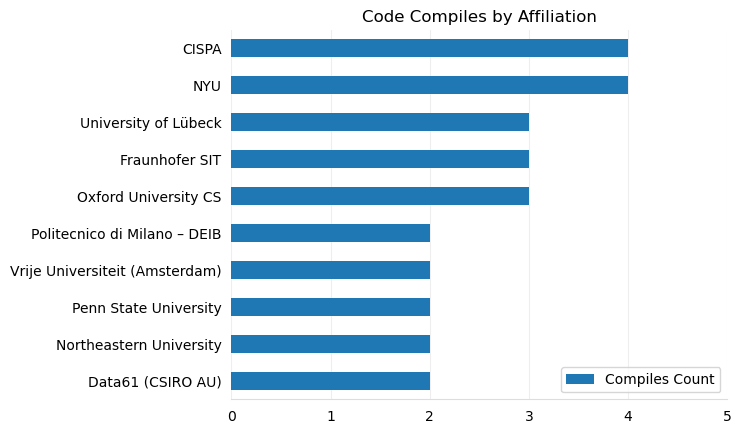

In [18]:
group = group.tail(10)
ax = group.plot(kind='barh', title='Code Compiles by Affiliation')
new_ticks = np.linspace(0, 5, 6)  
ax.set_xticks(new_ticks)
ax.set_yticklabels(group['Uni'])

ax.legend(['Compiles Count'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')

fig = ax.get_figure()
# fig.savefig("compiles_by_aff.pdf",dpi=1200,bbox_inches = "tight")